<a href="https://colab.research.google.com/github/RyanXHF/ml_cluster/blob/main/ryan_henrique_recomendador_de_musicas_online_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introdução

Quem nunca notou como as músicas que ouvimos no modo aleatório em aplicativos de música parecem estar longe de ser aleatórias? Já pensou como um aplicativo pode nos recomendar uma música com tanta precisão? E não é só com apps de música ou streaming; até em vídeos, como quando um serviço sugere “Se você gostou deste filme, talvez goste de outros” ou o YouTube oferece “Vídeos relacionados ao lado”.

Como esses algoritmos funcionam? Como eles definem e geram essas recomendações? Nesta aula, vamos explorar como construir um sistema de recomendação de músicas utilizando coletados a partir de uma API disponibilizado pelo Spotify.




[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

## 1.1 Dicionário dos dados

Os dados necessários para desenvolver todo o nosso trabalho foram retirados da API do Spotify e já foram previamente tratados.

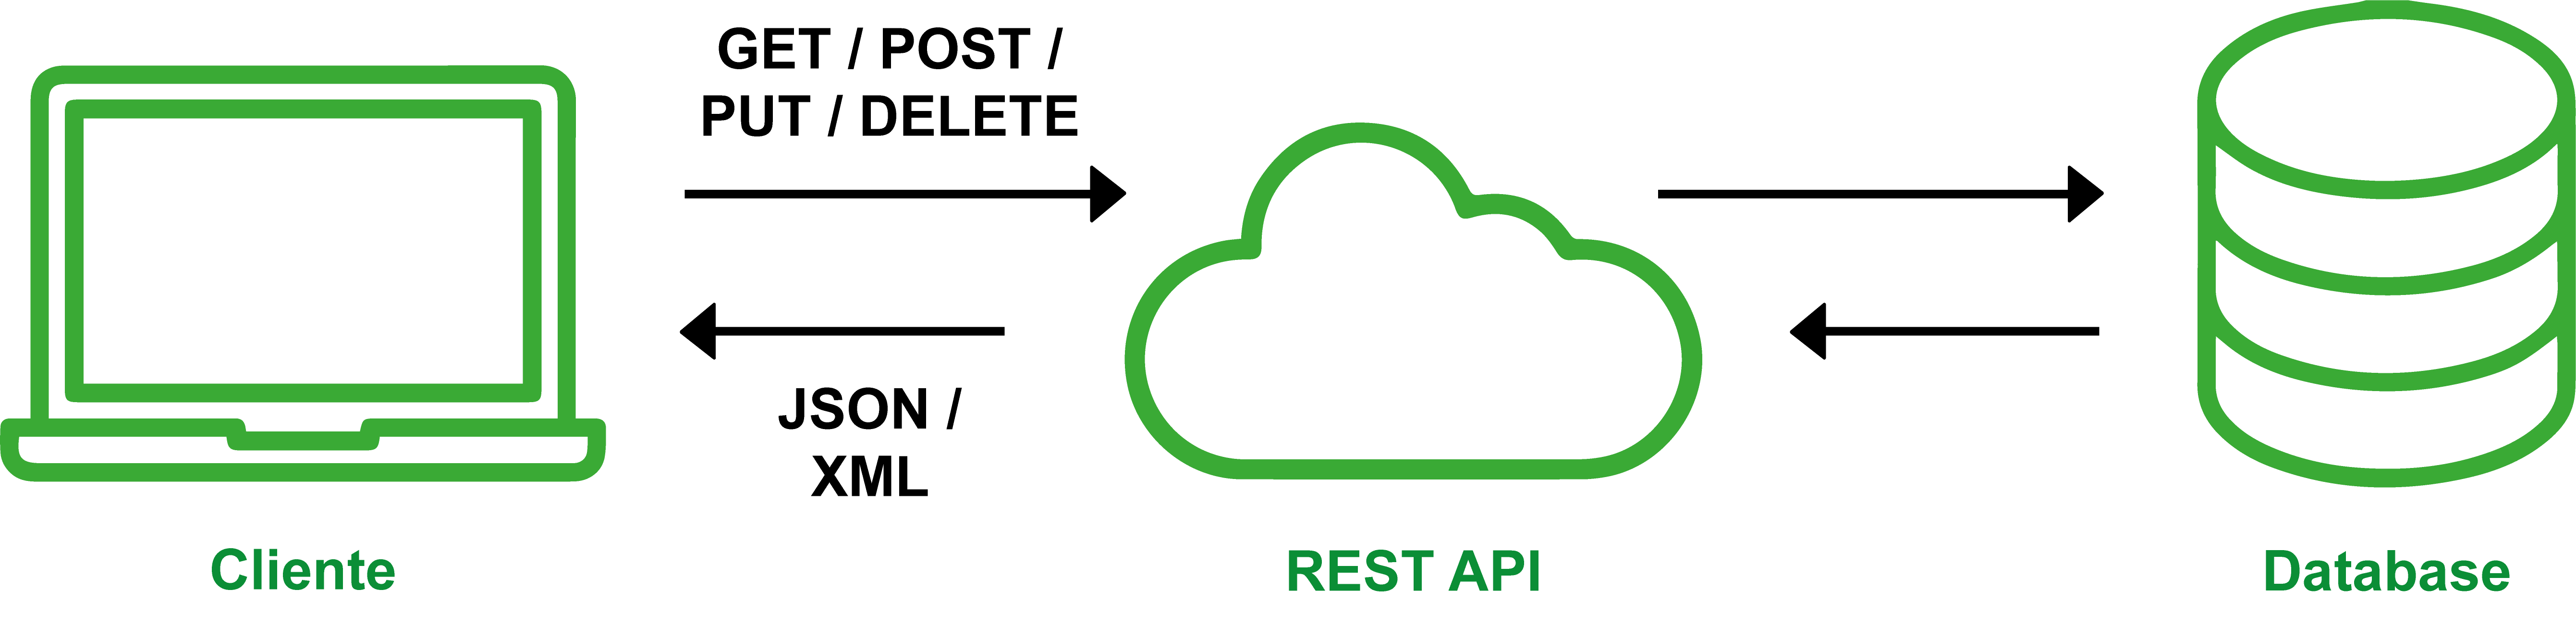

É importante conhecer o básico sobre os conceitos de retirada dos dados. API é a abreviação para Application Programming Interface, que em uma tradução livre pode ser Interface de Programação de Aplicação. Ela funciona como um atalho para o banco de dados, com uma série de padrões e protocolos e a API do Spotify funciona utilizando os princípios REST, que nos retornam arquivos json com os metadados das informações requeridas, como artista, música, álbum e faixa, que são retirados diretamente do catálogo do Spotify.



* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## 1.2 Analise dos dados

### Importando e vizualindo dados

Obs.: crie um repositório no seu github (dados_totais, dados_generos e dados_anos)

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np

# urls
url_total = 'https://raw.githubusercontent.com/RyanXHF/ml_cluster/main/Dados_totais.csv'
url_year = 'https://raw.githubusercontent.com/RyanXHF/ml_cluster/main/data_by_year.csv'
url_genres = 'https://raw.githubusercontent.com/RyanXHF/ml_cluster/main/data_by_genres.csv'

# leitura dos dados
db_total = pd.read_csv(url_total)
db_year = pd.read_csv(url_year)
db_genres = pd.read_csv(url_genres)

In [ ]:
db_total = db_total.drop(['explicit', 'key', 'mode'], axis = 1)
db_total.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End


In [ ]:
db_year = db_year.drop(['key', 'mode'], axis = 1)
db_year.head(3)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333
1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845
2,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189


In [ ]:
db_genres = db_genres.drop(['key', 'mode'], axis = 1)
db_genres.head(3)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.1260,-9.180000,0.047000,133.444000,0.975000,48.000000


### Verificando o tipo dos dados e seus valores

In [ ]:
db_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           20311 non-null  float64
 1   year              20311 non-null  int64  
 2   acousticness      20311 non-null  float64
 3   artists           20311 non-null  object 
 4   danceability      20311 non-null  float64
 5   duration_ms       20311 non-null  int64  
 6   energy            20311 non-null  float64
 7   id                20311 non-null  object 
 8   instrumentalness  20311 non-null  float64
 9   liveness          20311 non-null  float64
 10  loudness          20311 non-null  float64
 11  name              20311 non-null  object 
 12  popularity        20311 non-null  int64  
 13  speechiness       20311 non-null  float64
 14  tempo             20311 non-null  float64
 15  artists_song      20311 non-null  object 
dtypes: float64(9), int64(3), object(4)
memor

In [ ]:
db_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              100 non-null    int64  
 1   acousticness      100 non-null    float64
 2   danceability      100 non-null    float64
 3   duration_ms       100 non-null    float64
 4   energy            100 non-null    float64
 5   instrumentalness  100 non-null    float64
 6   liveness          100 non-null    float64
 7   loudness          100 non-null    float64
 8   speechiness       100 non-null    float64
 9   tempo             100 non-null    float64
 10  valence           100 non-null    float64
 11  popularity        100 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 9.5 KB


In [ ]:
db_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2973 non-null   object 
 1   acousticness      2973 non-null   float64
 2   danceability      2973 non-null   float64
 3   duration_ms       2973 non-null   float64
 4   energy            2973 non-null   float64
 5   instrumentalness  2973 non-null   float64
 6   liveness          2973 non-null   float64
 7   loudness          2973 non-null   float64
 8   speechiness       2973 non-null   float64
 9   tempo             2973 non-null   float64
 10  valence           2973 non-null   float64
 11  popularity        2973 non-null   float64
dtypes: float64(11), object(1)
memory usage: 278.8+ KB


### Vrificando a existência de dados Null e NaN

In [ ]:
db_total.isnull().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
id,0
instrumentalness,0
liveness,0


In [ ]:
db_year.isnull().sum()

,0
year,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


In [ ]:
db_genres.isnull().sum()

,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


## 1.3 Análise gráfica

### Análise temporal (dados_anos)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=db_year['year'], y=db_year['speechiness'],
                    name='Speechiness'))

fig.show()

### Análise de Correlação de Features

In [ ]:
import plotly.express as px
fig = px.imshow(db_total.drop(['artists', 'id', 'name', 'artists_song'],axis=1).corr(), text_auto=True)
fig.show()

# 2 - Clusterização (agrupamento)

Quando lidamos com um problema de agrupamento, queremos usar um algoritmo que descubra grupos significativos nos dados, como é o nosso caso, queremos criar agrupamentos de músicas. Seja para qualquer outro fim, o algoritmo descobre os grupos sem intervenções externas, já que não precisa de rótulos para realizar previsões.

Um algoritmo clássico de clusterização é o K-means, que tenta organizar os dados em um número k de clusters (grupos), que definimos iicialmente, e, a partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível. O cálculo das semelhanças é feito utilizando a distância euclidiana ou uma linha reta comum entre dois pontos. Quanto menor a distância euclidiana, mais próximo os dois pontos estão e mais semelhantes eles são por consequência.

O processo de como o K-means funciona é relativamente simples e repetitivo.

1.  O usuário define o valor de clusters (k);
2.  O K-means seleciona um ponto aleatório para cada centróide, temos k-centróides nesse ponto, e um centróide é o ponto em torno do qual cada cluster é construído;
3. A distância euclidiana é calculada entre cada ponto e cada centróide, e, a partir disto, cada ponto será atribuído a um centróide (mais próximo com base na distância euclidiana);
4. O algoritmo calcula a média da distância euclidiana entre cada ponto do cluster e o centróide para definir um novo centróide;
5. O processo 4 se repete até que os centróides dos clusters não se movam mais.

Veja a uma animação de como esse processo acontece no [K-Means Clustering Demo.](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)


## 2.1 - Clusterização por música

### 2.1.1 - One-Hot Encoder

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

x = db_total
one_hot = OneHotEncoder(drop = 'if_binary')
transformer = make_column_transformer(
    (one_hot, ['artists']),
    remainder='passthrough',
    sparse_threshold=0)

transformer.fit_transform(x)

x = transformer.fit_transform(db_total)
colunas = transformer.get_feature_names_out()
x_one_hot = pd.DataFrame(x, columns = colunas)

x_one_hot = x_one_hot.drop(['remainder__artists_song', 'remainder__id','remainder__name'], axis=1)

### 2.1.2 - PCA e SdandardScaler

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])
music_embedding_pca = pca_pipeline.fit_transform(x_one_hot)
projection_m = pd.DataFrame(data=music_embedding_pca)
projection_m

,0,1,2,3,4,5,6,7,8,9,...,602,603,604,605,606,607,608,609,610,611
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,0.002516,0.002097,-0.019072,-0.009111,0.005154,-0.034027,-0.032617,3.144489e-10,8.465090e-11,5.158227e-11
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,0.036047,-0.026825,-0.031678,-0.031986,0.029708,-0.016322,-0.030234,9.616228e-11,2.946036e-10,8.192778e-11
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,-0.013908,0.007214,0.003084,0.017097,0.017361,-0.010979,-0.012781,2.744885e-10,1.250027e-10,8.489697e-11
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.038784,0.020814,-0.046126,0.089337,0.164777,-0.064148,-0.040911,1.529553e-09,2.566440e-10,6.884598e-10
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,0.006291,0.003111,-0.009148,-0.011937,-0.004081,-0.017478,-0.010033,2.769743e-11,7.305256e-11,-2.851327e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.346699,-2.775889,0.986755,-1.704967,0.103935,-0.726582,0.253808,0.520234,-0.064513,0.204971,...,-0.155320,0.335148,0.103481,-0.235355,-0.054256,0.016922,-0.125947,-5.812624e-10,3.954114e-10,-1.369736e-10
20307,1.269387,-2.444619,0.971408,-0.115303,-0.719597,-1.823579,-0.545186,-1.475719,-0.338390,0.272129,...,0.264741,0.210461,-0.094337,-0.183026,0.074605,0.005622,0.000054,-2.385987e-11,-9.808374e-11,-5.965177e-11
20308,0.781916,-1.164865,0.705256,-0.947160,1.145828,-0.472667,-0.356604,0.972512,0.900317,-0.674016,...,0.263781,-0.189241,0.213993,-0.033420,-0.157564,0.213849,-0.065180,-2.272363e-09,-3.031441e-10,1.543908e-10
20309,0.002454,-3.056407,-0.272934,1.436355,-0.604453,0.251492,-1.361710,-0.633245,0.280076,0.521145,...,0.398941,0.560966,-0.437674,-0.784640,0.080684,0.038379,0.108493,-2.144778e-09,1.443073e-10,-5.590282e-10


### 2.1.3 K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=50, verbose=False, random_state=SEED)
kmeans_pca.fit(projection_m)

db_total['cluster_pca'] = kmeans_pca.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca.predict(projection_m)
projection_m['artists'] = db_total['artists']
projection_m['name'] = db_total['name']
projection_m['song'] = db_total['artists_song']
projection_m['id'] = db_total['id']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### 2.1.4 - Plotando oa clusters

In [ ]:
fig = px.scatter(
   projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'song'])
fig.show() # As colunas estão ordenadas por ordem de porcentagem de representação

### 2.1.5 - Avaliando o cluster

In [ ]:
print(pca_pipeline[1].explained_variance_ratio_.sum())
print(pca_pipeline[1].explained_variance_.sum())

0.7000008463186458
620.9313218688822


# 3 - Sistemas de Recomendação

## 3.1 - Spotipy

In [ ]:
# pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.metrics.pairwise import euclidean_distances

client_credentials_manager = SpotifyClientCredentials(
    client_id = '292c96b242ae4307a349b69bb8f81d18',
    client_secret= 'e0df729913184efd9831400042131716'
)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### 3.1.1 - Função para obter Url e Nome

In [ ]:
def recommend_id(id_recomendados_list):
  url = []
  name = []
  artist = []
  for i in id_recomendados_list:
    track = sp.track(i)
    url.append(track['album']['images'][0]['url'])
    name.append(track['name'])
    artist.append(track['artists'][0]['name'])
  return name, artist, url

# Teste da função de nome e url
id_list = ['7CAbF0By0Fpnbiu6Xn5ZF7', '1Vej0qeQ3ioKwpI6FUbRv1']

recommend_id(id_list)

(['Kingslayer (feat. BABYMETAL)', 'Papercut'],
 ['Bring Me The Horizon', 'Linkin Park'],
 ['https://i.scdn.co/image/ab67616d0000b2735149c948fde506624246a684',
  'https://i.scdn.co/image/ab67616d0000b273e2f039481babe23658fc719a'])

### 3.1.2 - Função para melhor visualização das imagens

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name, artist, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url):
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i] + ' - ' + artist[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=False)
    plt.show()

### 3.1.3 - Função para encontrar o id das musicas recomendadas

In [ ]:
def id_recomendados(musica_ref, db_projections):

  cluster = db_projections[db_projections['song'] == musica_ref]['cluster_pca'].values[0]
  x_musica = db_projections[db_projections['song'] == musica_ref][0].iloc[0]
  y_musica = db_projections[db_projections['song'] == musica_ref][1].iloc[0]

  musicas_recomendadas = db_projections[db_projections['cluster_pca'] == cluster]
  musicas_recomendadas = musicas_recomendadas[musicas_recomendadas['song'] != musica_ref]
  musicas_recomendadas = musicas_recomendadas[['id',0,1,'song']]

  distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica, y_musica]])
  musicas_recomendadas['distancia'] = distancias
  musicas_recomendadas.sort_values('distancia', inplace=True)
  musicas_recomendadas[['song','distancia']].head(10)

  return musicas_recomendadas['id'].head(10).values

## 3.2 - Função do Recomendador

* Entrada: O nome de uma musica
* Saída: Uma lista de musicas recomendadas

In [ ]:
def musicas_recomendadas(musica_ref, db_projections):

  m_r = id_recomendados(musica_ref, db_projections)

  name_recomendadas, artist_recomendadas, url_recomendadas = recommend_id(m_r)

  return visualize_songs(name_recomendadas, artist_recomendadas, url_recomendadas)

### 3.2 - Testes da função

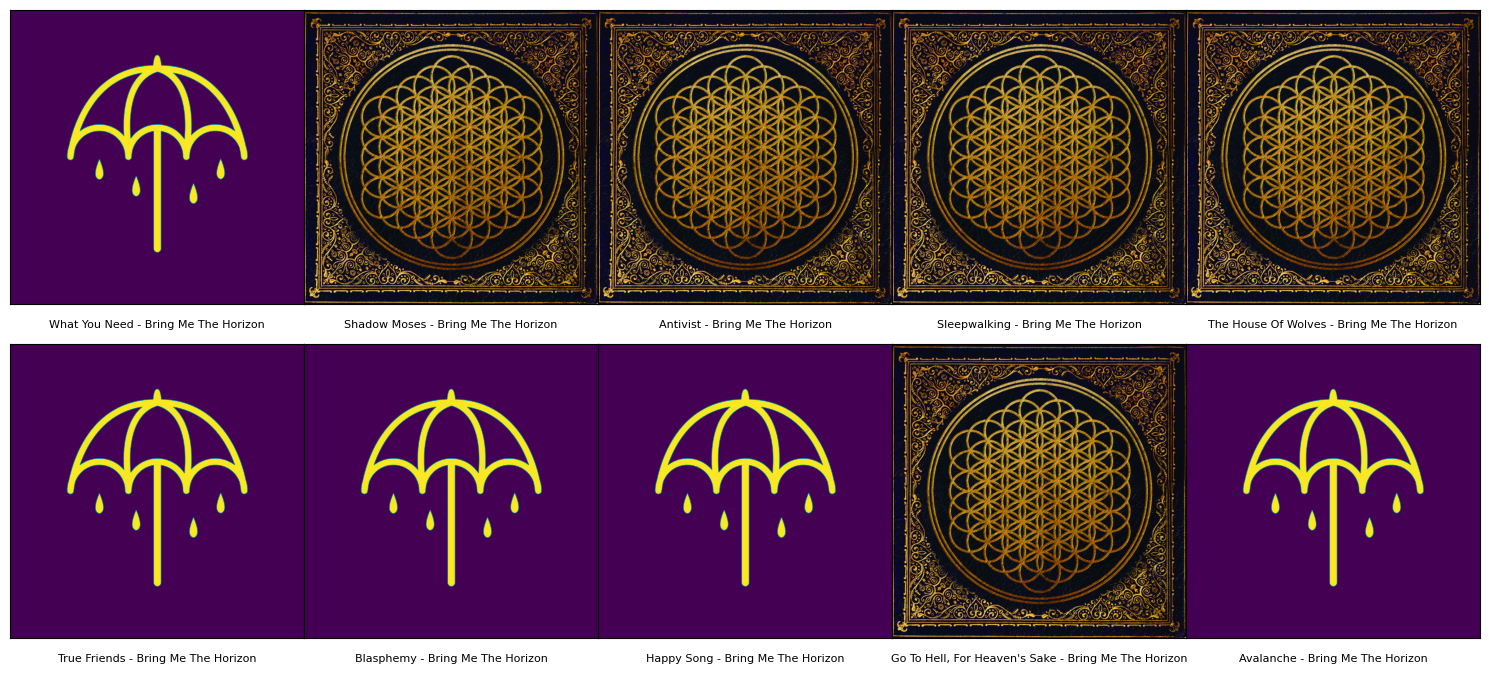

In [ ]:
id_music_r = musicas_recomendadas('Bring Me The Horizon - Drown', projection_m)